In [ ]:
pip install mplfinance

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as mticker

In [86]:
# Dataseet
file_path = "/content/Cópia de Challenge 3_NFLX.xlsx"
data = pd.read_excel(file_path)

In [87]:
# Modelagem dos dados
data['Date'] = pd.to_datetime(data['Date'])

last_30_days = data.tail(30)

candlestick_data = last_30_days[['Open', 'High', 'Low', 'Close']]

scaler = StandardScaler()
candlestick_data_normalized = scaler.fit_transform(candlestick_data)


In [ ]:
# Método do cotovelo para encontrar o número ideal de clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(candlestick_data_normalized)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Definir o Número de Clusters')
plt.grid(True)
plt.show()

In [103]:
# Aplicando o K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(candlestick_data_normalized)

last_30_days['Cluster'] = kmeans.labels_

print(last_30_days.head())

           Date      Open      High       Low     Close  Cluster
5014 2002-07-05  1.214286  1.299286  1.213571  1.276429        2
5015 2002-07-03  1.178571  1.214286  1.117857  1.214286        2
5016 2002-07-02  1.053571  1.195000  1.039286  1.172857        1
5017 2002-07-01  1.000000  1.046429  0.992857  1.027857        0
5018 2002-06-28  0.960714  1.013571  0.960714  0.999286        0


<ipython-input-103-c360ae8dfc2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_days['Cluster'] = kmeans.labels_


In [104]:
print(last_30_days[['Date', 'Open', 'High', 'Low', 'Close', 'Cluster']])


           Date      Open      High       Low     Close  Cluster
5014 2002-07-05  1.214286  1.299286  1.213571  1.276429        2
5015 2002-07-03  1.178571  1.214286  1.117857  1.214286        2
5016 2002-07-02  1.053571  1.195000  1.039286  1.172857        1
5017 2002-07-01  1.000000  1.046429  0.992857  1.027857        0
5018 2002-06-28  0.960714  1.013571  0.960714  0.999286        0
5019 2002-06-27  1.009286  1.018571  0.942857  0.943571        0
5020 2002-06-26  0.963571  0.996429  0.921429  0.988571        0
5021 2002-06-25  0.988571  1.007143  0.947143  0.964286        0
5022 2002-06-24  0.979286  1.014286  0.957143  0.978571        0
5023 2002-06-21  0.982143  0.989286  0.947857  0.979286        0
5024 2002-06-20  0.971429  1.040000  0.950000  0.957143        0
5025 2002-06-19  0.911429  0.996429  0.892857  0.951429        0
5026 2002-06-18  0.938571  0.939286  0.842143  0.910714        0
5027 2002-06-17  1.013571  1.059286  0.917857  0.922143        0
5028 2002-06-14  1.082143

Inércia do K-means: 15.68623472330158
Silhouette Score: 0.5276 (52.76%)
Davies-Bouldin Index: 0.6482844740916779


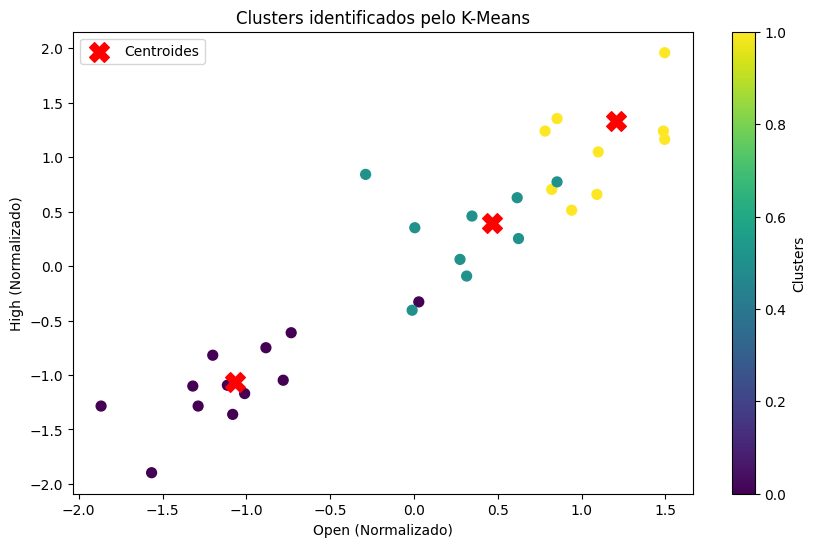

In [119]:
# Avaliação do K-means
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(candlestick_data_normalized, kmeans.labels_)
davies_bouldin = davies_bouldin_score(candlestick_data_normalized, kmeans.labels_)
silhouette_percentage = silhouette_avg * 100
# Exibir os resultados
print(f"Inércia do K-means: {inertia}")
print(f"Silhouette Score: {silhouette_avg:.4f} ({silhouette_percentage:.2f}%)")
print(f"Davies-Bouldin Index: {davies_bouldin}")

plt.figure(figsize=(10, 6))
plt.scatter(candlestick_data_normalized[:, 0], candlestick_data_normalized[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title("Clusters identificados pelo K-Means")
plt.xlabel("Open (Normalizado)")
plt.ylabel("High (Normalizado)")
plt.colorbar(label='Clusters')
plt.legend()
plt.show()

<ipython-input-125-d3675a537d42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_days['Cluster_DBSCAN'] = dbscan.fit_predict(candlestick_data_normalized)


DBSCAN - Número de Clusters: 2
DBSCAN - Silhouette Score: 0.3715
DBSCAN - Davies-Bouldin Index: 0.6433


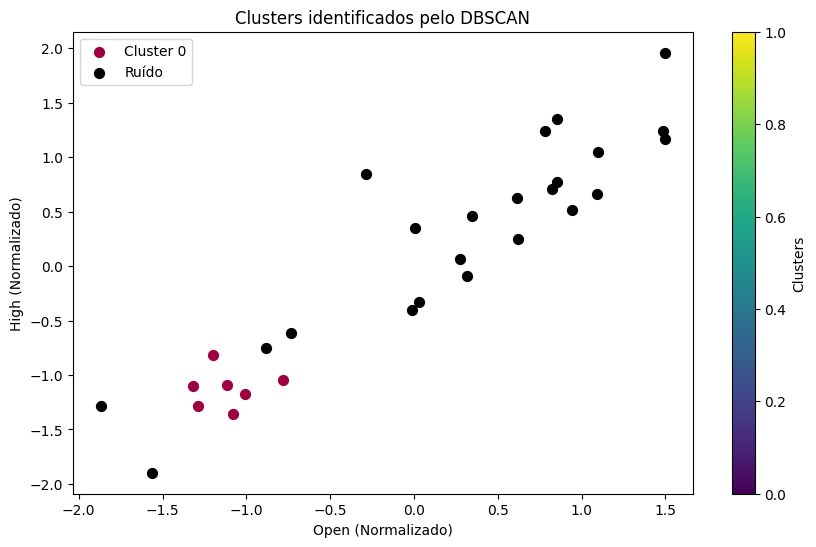

In [125]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
last_30_days['Cluster_DBSCAN'] = dbscan.fit_predict(candlestick_data_normalized)

labels = last_30_days['Cluster_DBSCAN']
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters > 1:
    silhouette_avg = silhouette_score(candlestick_data_normalized, labels)
    davies_bouldin = davies_bouldin_score(candlestick_data_normalized, labels)

    print(f"DBSCAN - Número de Clusters: {n_clusters}")
    print(f"DBSCAN - Silhouette Score: {silhouette_avg:.4f}")
    print(f"DBSCAN - Davies-Bouldin Index: {davies_bouldin:.4f}")
else:
    print("DBSCAN não encontrou clusters.")



plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(float(i) / len(unique_labels)) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído
        col = 'k'  # Preto para ruído
    class_member_mask = (labels == k)

    # Plotar os dados
    plt.scatter(candlestick_data_normalized[class_member_mask, 0],
                candlestick_data_normalized[class_member_mask, 1],
                color=col,
                label=f'Cluster {k}' if k != -1 else 'Ruído',
                s=50)

plt.title("Clusters identificados pelo DBSCAN")
plt.xlabel("Open (Normalizado)")
plt.ylabel("High (Normalizado)")
plt.colorbar(label='Clusters')
plt.legend()
plt.show()

<ipython-input-118-986946f693df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_days['Cluster_GMM'] = gmm.predict(candlestick_data_normalized)


GMM - Número de Clusters: 3
GMM - Silhouette Score: 0.4164
GMM - Davies-Bouldin Index: 0.8681


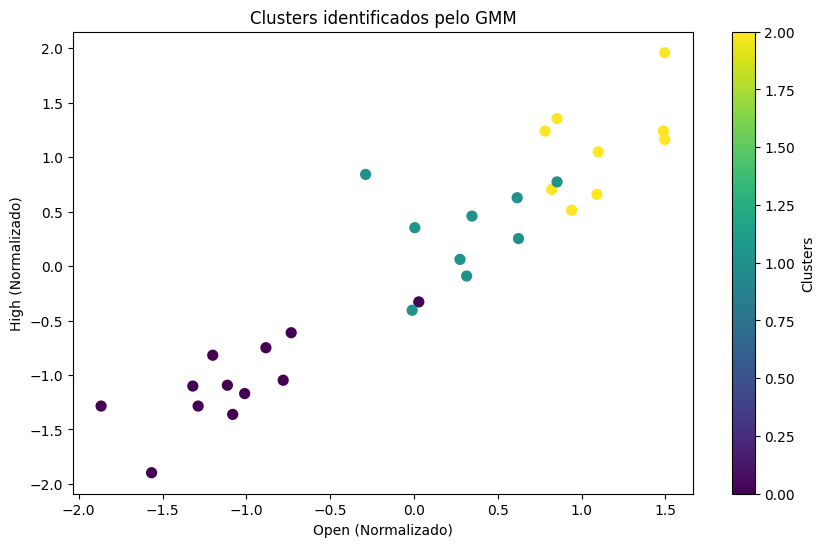

In [118]:
from sklearn.mixture import GaussianMixture

# Definir e ajustar o modelo GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Ajuste n_components conforme necessário
gmm.fit(candlestick_data_normalized)

# Prever os clusters
last_30_days['Cluster_GMM'] = gmm.predict(candlestick_data_normalized)

# Avaliação do GMM
labels = last_30_days['Cluster_GMM']
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters > 1:  # Apenas calcula se há mais de um cluster
    silhouette_avg = silhouette_score(candlestick_data_normalized, labels)
    davies_bouldin = davies_bouldin_score(candlestick_data_normalized, labels)

    print(f"GMM - Número de Clusters: {n_clusters}")
    print(f"GMM - Silhouette Score: {silhouette_avg:.4f}")
    print(f"GMM - Davies-Bouldin Index: {davies_bouldin:.4f}")
else:
    print("GMM não encontrou clusters.")

# Opcional: Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(candlestick_data_normalized[:, 0], candlestick_data_normalized[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clusters identificados pelo GMM")
plt.xlabel("Open (Normalizado)")
plt.ylabel("High (Normalizado)")
plt.colorbar(label='Clusters')
plt.show()